# Entregável 1 - visão computacional

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


In [4]:
import sys
print(sys.version)


2.7.13 |Continuum Analytics, Inc.| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]


# Equalização de histograma

In [5]:
rintin = cv2.imread("RinTinTin.jpg")

In [6]:
rintin.shape

(240L, 320L, 3L)

In [7]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [8]:
rintin_gray.shape

(240L, 320L)

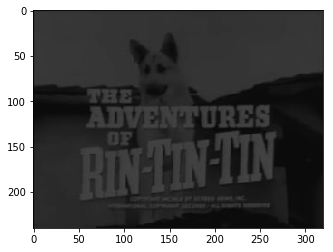

In [9]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

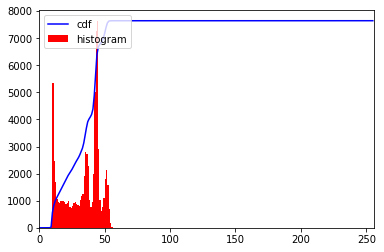

In [10]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

O histograma fornecido mostra que as cores estão concentradas em uma pequena faixa .

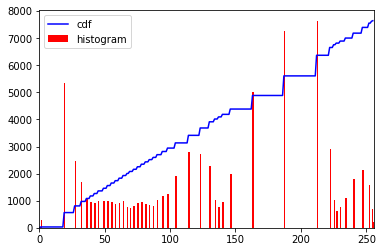

In [21]:
equ = cv2.equalizeHist(rintin_gray)

hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

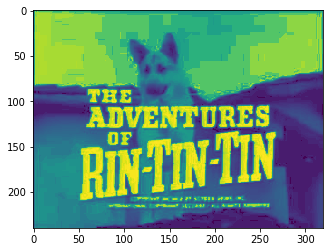

In [22]:
plt.imshow(equ)
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


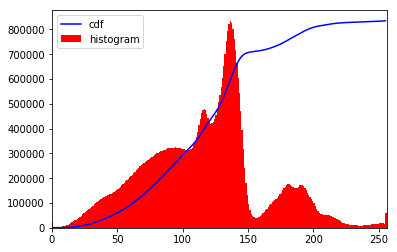

In [35]:
img = cv2.imread("hall_box_battery1.jpg")


hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

É possivel ver que existem alguns picos, que determinam uma maior quantidade de certa cor na imagem, porém é muito difícil determinar qual cor é qual.


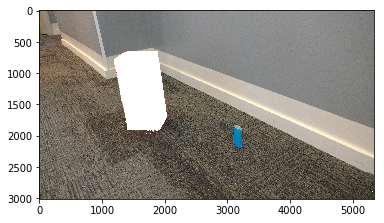

In [40]:
img = cv2.imread("hall_box_battery1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

white = np.array([255,255,255])
R = np.array([9,255,255])
r = np.array([0,100,0])

mask = cv2.inRange(img_hsv,r,R)
img_rgb[mask == 255] = [0, 0, 0]

res = cv2.bitwise_not(img_rgb,img_rgb,mask = mask)

plt.imshow(res)
plt.show()